In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

import validation_functions as vf

matplotlib.rcParams['figure.figsize'] = [16, 12]

In [2]:
data = vf.get_all_data()

In [3]:
np.shape(data)

(6, 120)

# Raster plots
An example for plotting raster plots for all the data

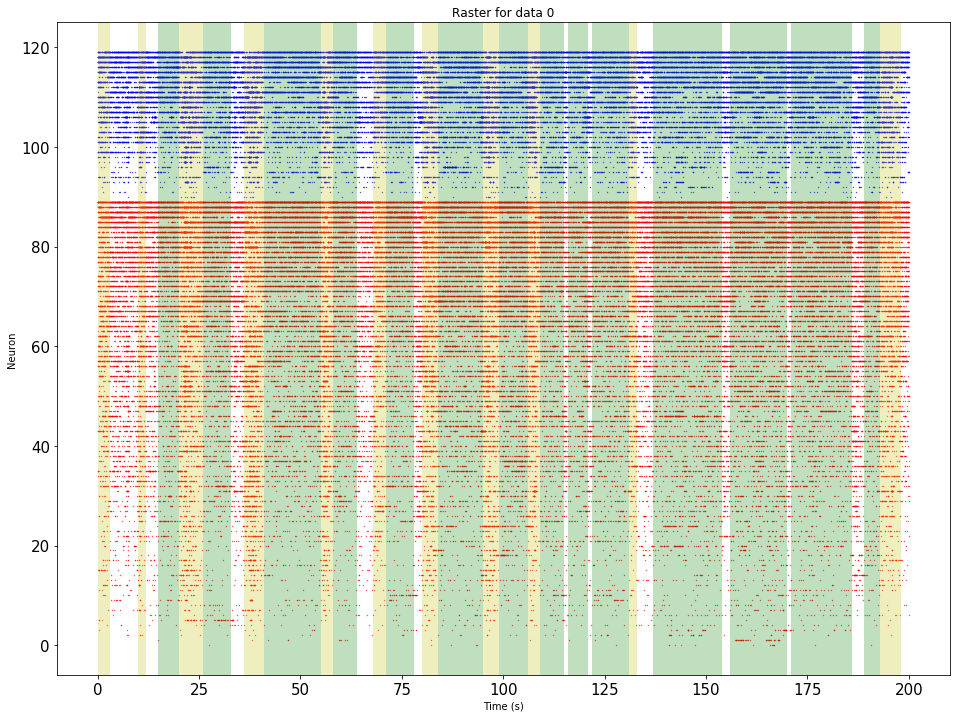

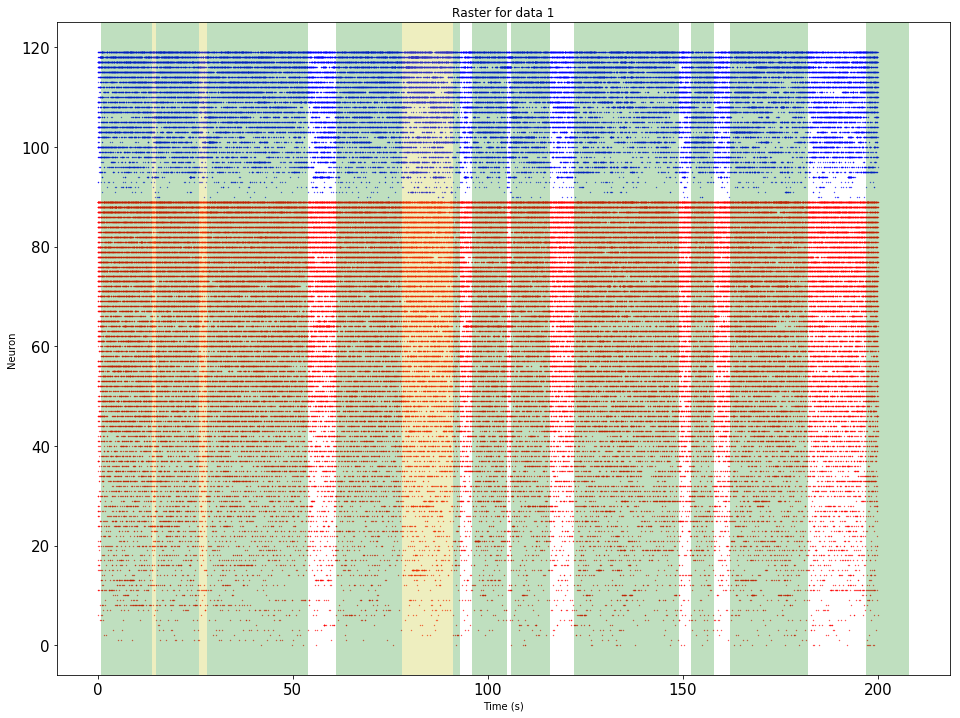

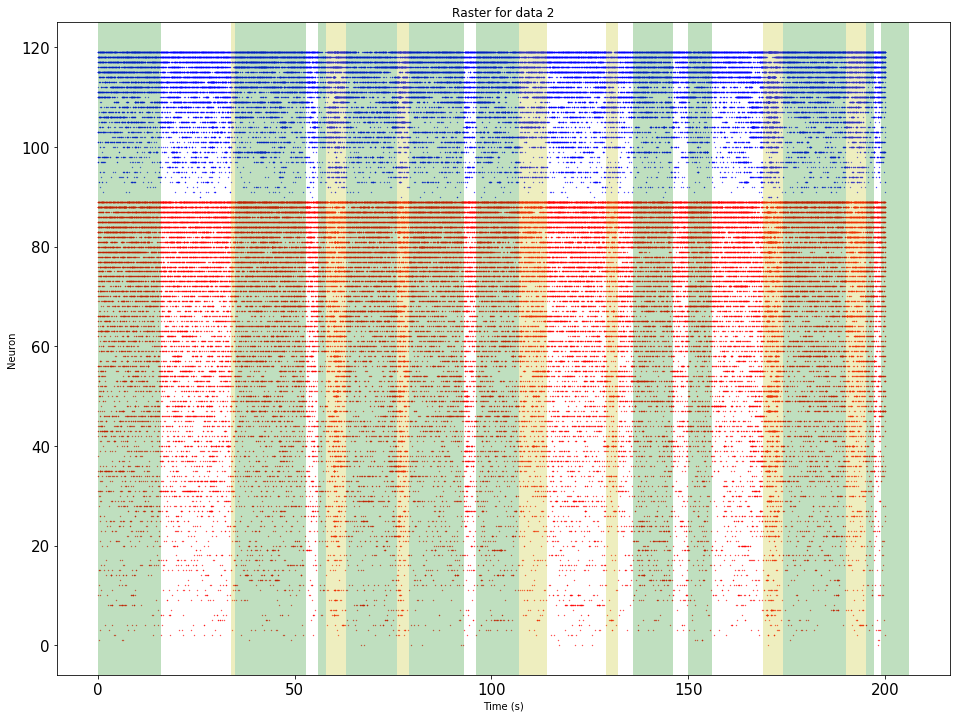

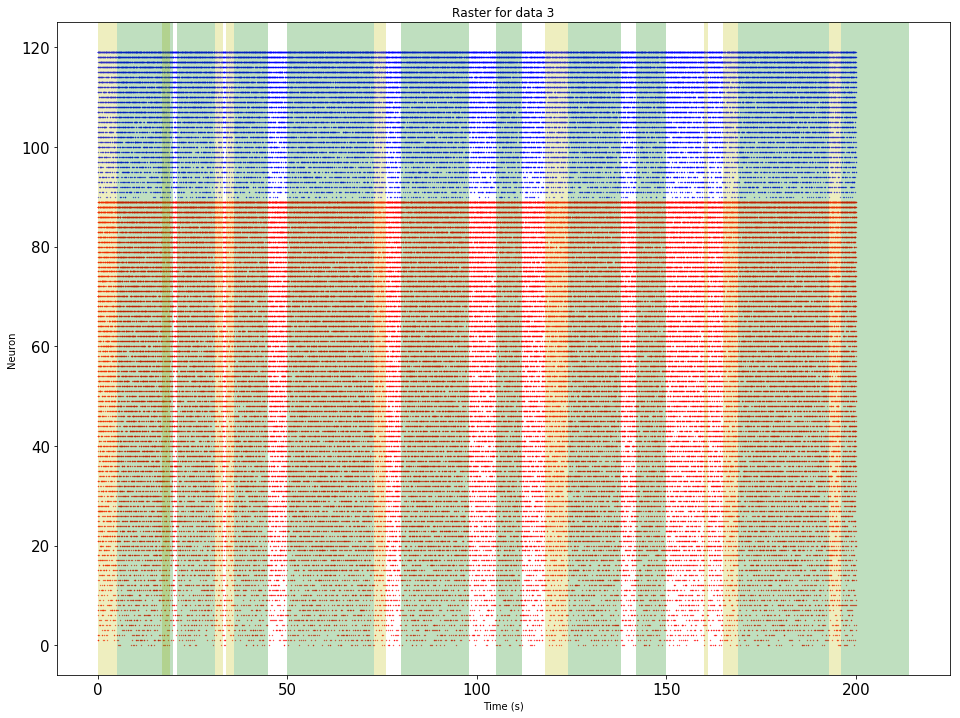

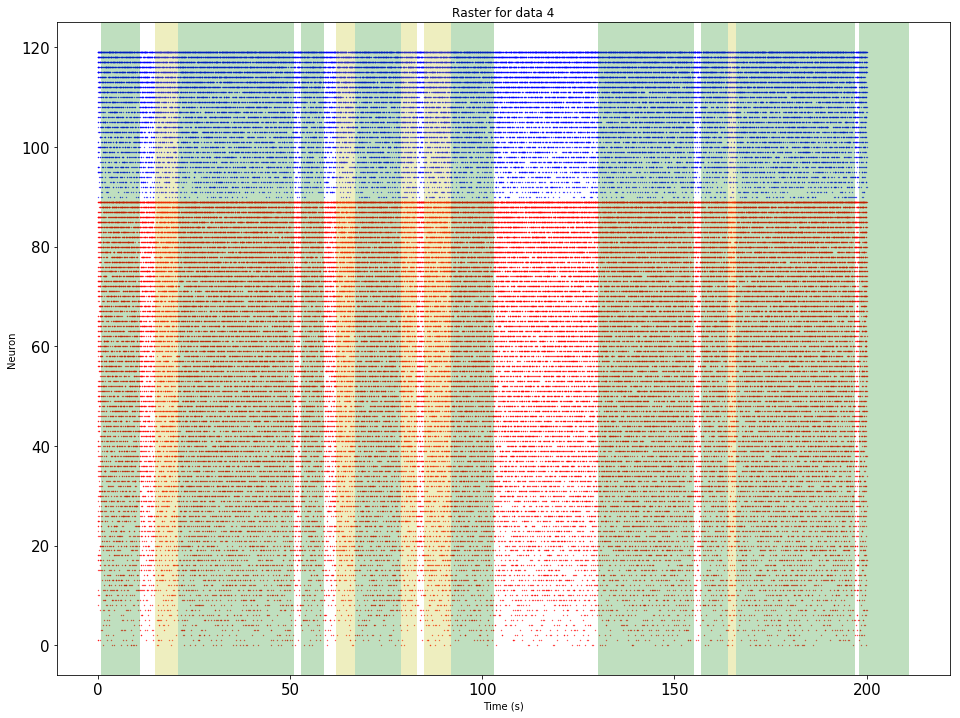

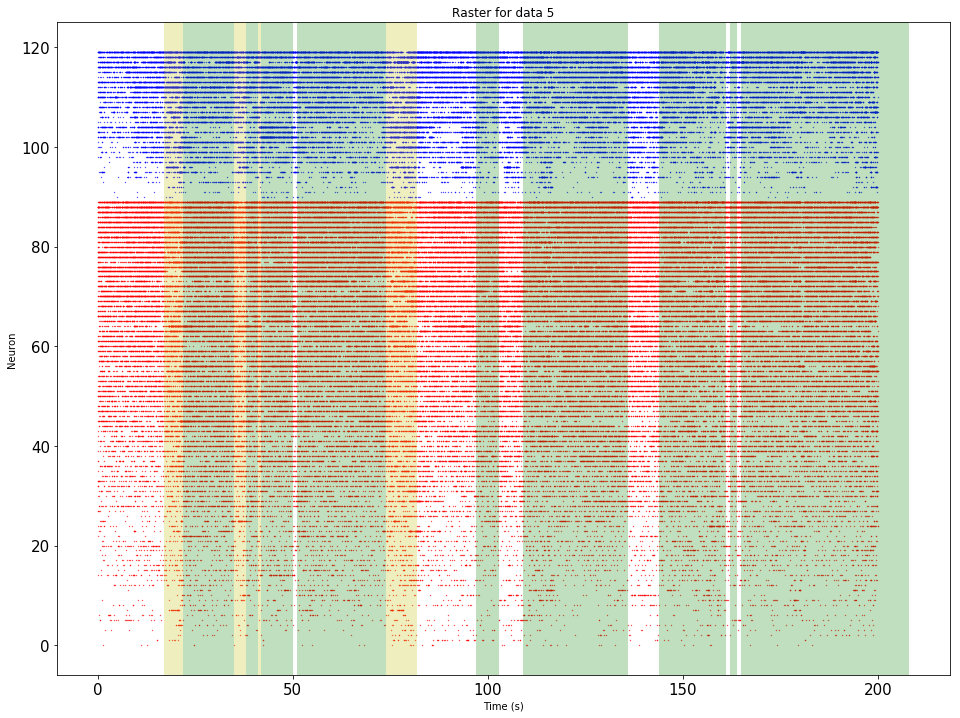

In [20]:
matplotlib.rcParams['figure.figsize'] = [16, 12]
for i, d in enumerate(data):
    vf.plot_raster(d, sorting=True, title='Raster for data %s' % i)
    plt.tick_params(axis='both', which='major', labelsize=15)
    plt.show()

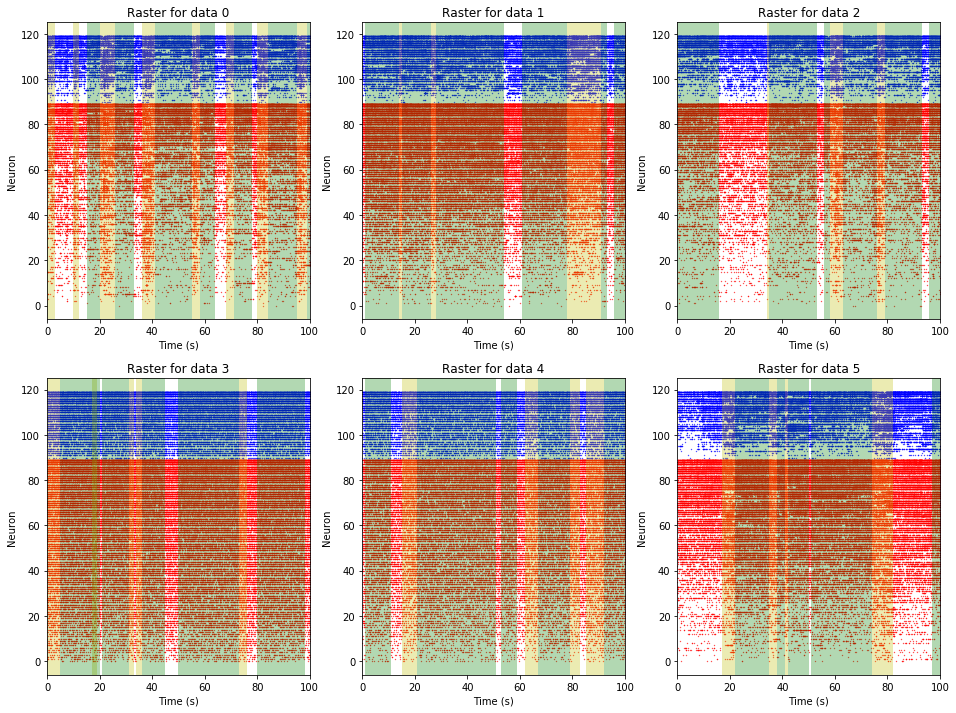

In [5]:
rows = 2
cols = 3
fig, ax = plt.subplots(nrows=rows, ncols=cols)
for i, d in enumerate(data):
    plt.subplot(rows, cols, i+1)
    vf.plot_raster(d, sorting=True, title='Raster for data %s' % i, max_time=100, bg_alpha=0.3)
matplotlib.rcParams['figure.figsize'] = [16, 12]
plt.show()

# Kruskal Wallis test
Testing if the mean firing rates appear to be from the same distribution

In [11]:
# Filter the data into excitatory and inhibitory neurons
exc = [vf.filter_data(x, neuron_type='exc', behavior=None) for x in data]
inh = [vf.filter_data(x, neuron_type='inh', behavior=None) for x in data]

In [12]:
print(np.shape(exc))
print(np.shape(inh))

(6, 90)
(6, 30)


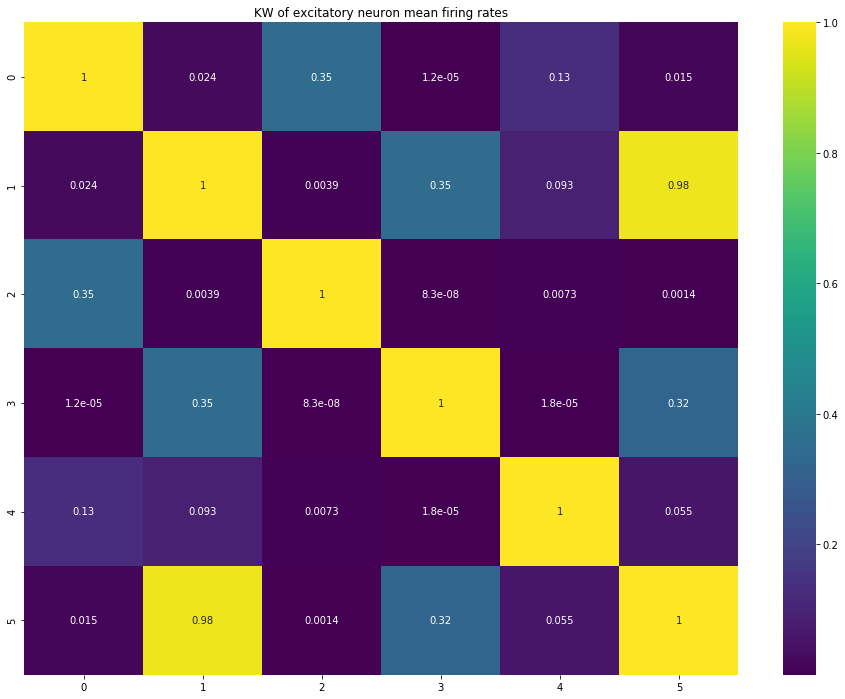

In [13]:
# In our functions we can calculate mean firing rate for one spike train
# What happens here is we iterate over all excitatory neurons in each dataset, and calculate mean firing rate per neuron
exc_mean_firing_rates = [[vf.mean_firing_rate(x) for x in measurement] for measurement in exc]
# Then plot the p-values for testing the underlying distributions of mean firing rates
kw_stats = vf.kw_pairwise(exc_mean_firing_rates, title='KW of excitatory neuron mean firing rates')

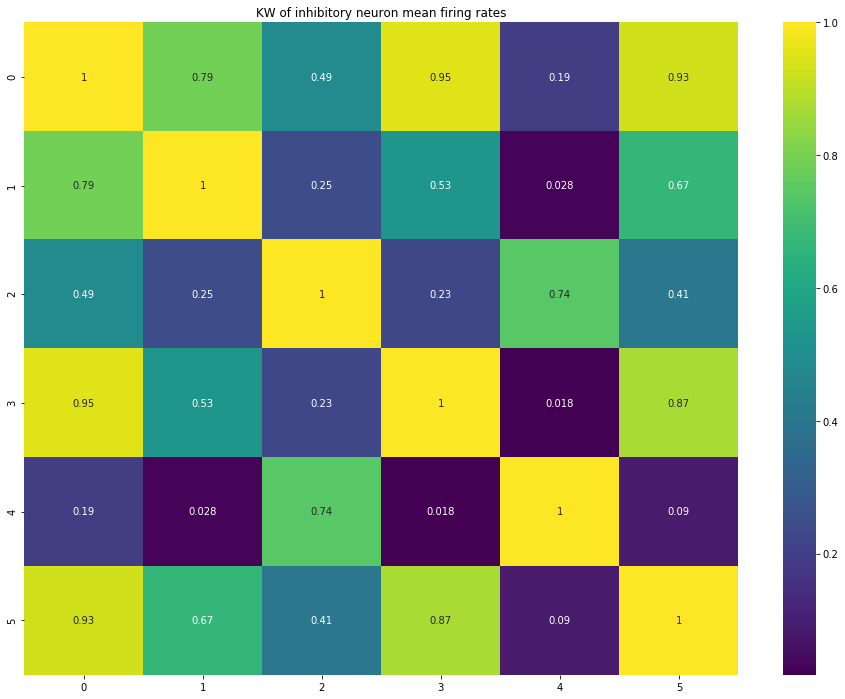

In [14]:
inh_mean_firing_rates = [[vf.mean_firing_rate(x) for x in measurement] for measurement in inh]
kw_stats = vf.kw_pairwise(inh_mean_firing_rates, title='KW of inhibitory neuron mean firing rates')

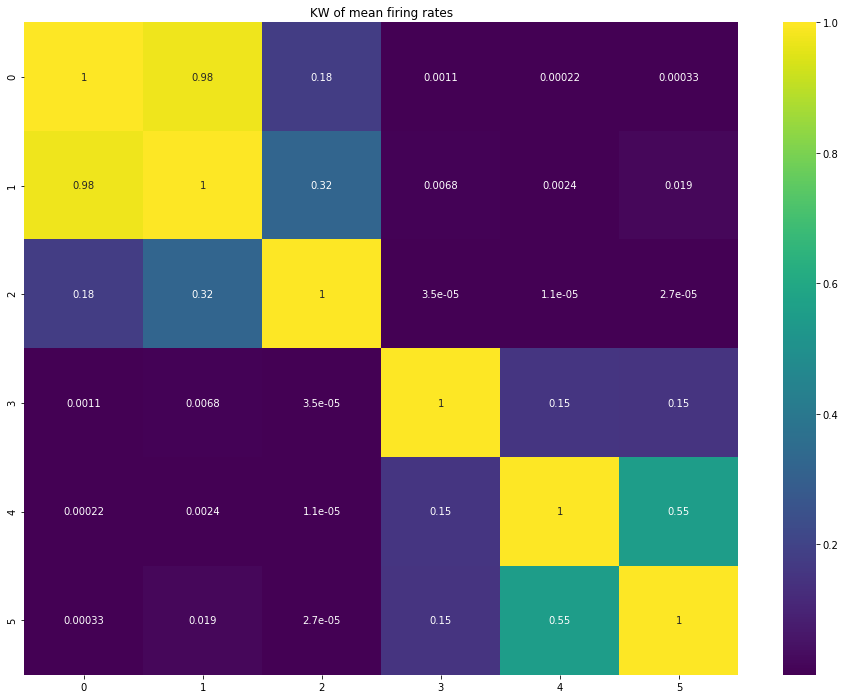

In [18]:
transitions = [vf.filter_data(x, neuron_type='exc', behavior='M') for x in data]
mfrs = [[vf.mean_firing_rate(x) for x in measurement] for measurement in transitions]
kw_stats = vf.kw_pairwise(mfrs, title='KW of mean firing rates')